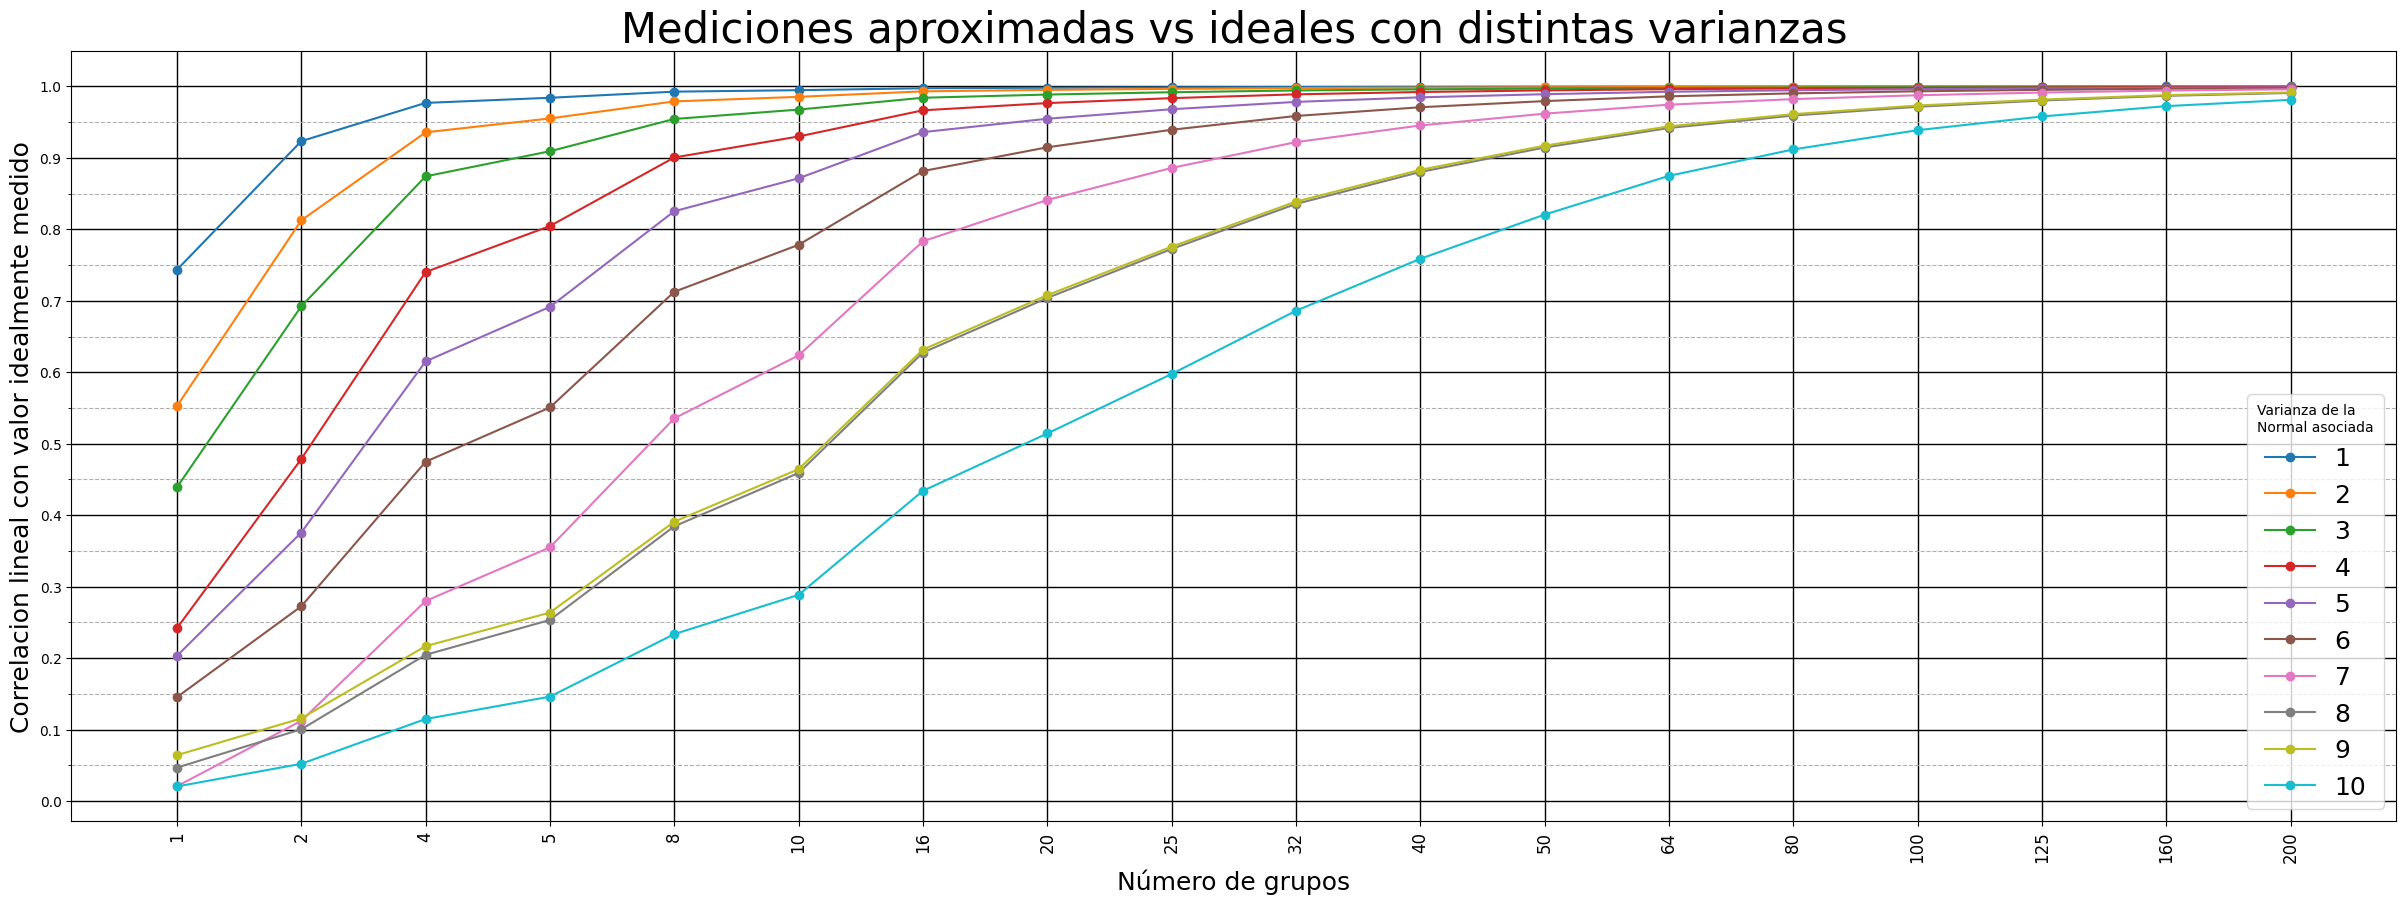

In [29]:
# from general import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datos_varianzas = pd.read_csv("../datos simulados/datos_varianzas.csv", sep='\t')
interes = [x  for x in range(5000,1_000_001) if 1000000%x==0]

def Test(datos_varianza, varianza):
    datos_loc = datos_varianza[datos_varianza['-1']==varianza]
    return [np.corrcoef(datos_loc['1'], datos_loc[str(tamGrupo)])[0][1] for tamGrupo in interes]

observaciones = list(zip(*[Test(datos_varianzas, var) for var in datos_varianzas['-1'].unique()]))
plt.figure(figsize = (30,10))
plt.plot(range(len(observaciones),0,-1),list(observaciones), '-o')
plt.xlabel("Número de grupos", fontsize=18)
plt.ylabel("Correlacion lineal con valor idealmente medido", fontsize=18)
plt.title("Mediciones aproximadas vs ideales con distintas varianzas",fontsize=30)
plt.xticks(range(len(observaciones),0,-1), labels=[1000000//x for x in interes], rotation = 90, fontsize=12)
plt.yticks(list(np.linspace(0,1,21)), minor=True)
plt.yticks(list(np.linspace(0,1,11)))
plt.legend(datos_varianzas['-1'].unique(), title = "Varianza de la \nNormal asociada", fontsize=18)
plt.grid(True,which="major",c="black", linewidth=1)
plt.grid(True,which="minor", linestyle="--")
plt.show()
# plt.savefig("../figuras/figura_4_mediciones_aproximadas_vs_ideal_varianza.png")



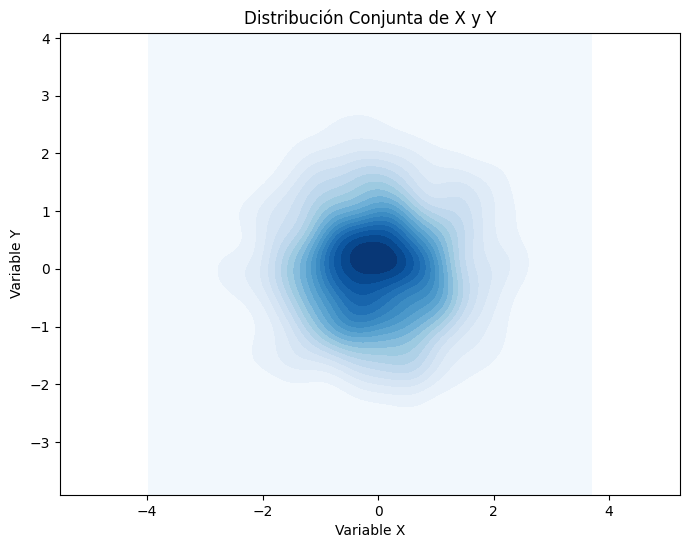

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Crear un gráfico de densidad bidimensional
plt.figure(figsize=(8, 6))
sns.kdeplot(x=x, y=y, cmap='Blues', fill=True, thresh=0, levels=20)
plt.title('Distribución Conjunta de X y Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.axis('equal')  # Para que los ejes tengan la misma escala
plt.show()


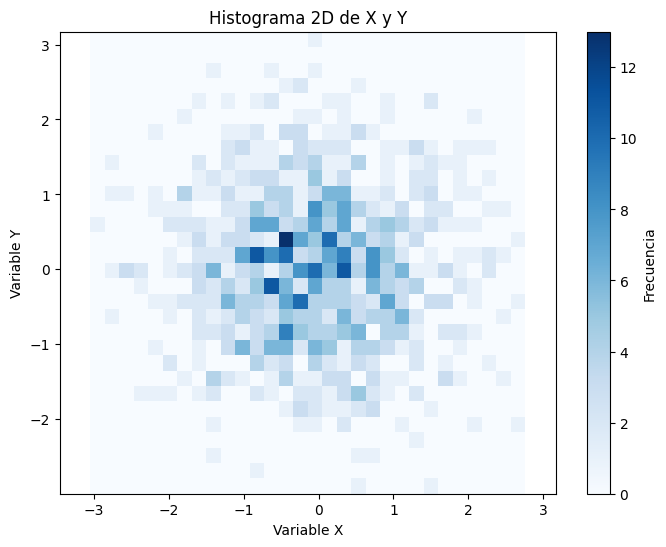

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)

# Crear un histograma 2D
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=30, cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Histograma 2D de X y Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.axis('equal')  # Para que los ejes tengan la misma escala
plt.show()


In [37]:
datos = datos_varianzas[datos_varianzas["-1"]==1]
datos['1000000']

0      0.499363
1      0.498693
2      0.498602
3      0.498508
4      0.500279
         ...   
995    0.500517
996    0.500149
997    0.500976
998    0.499650
999    0.500275
Name: 1000000, Length: 1000, dtype: float64

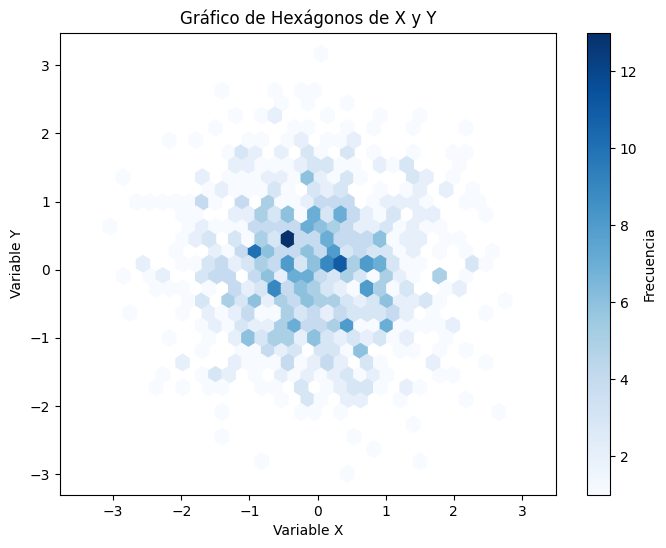

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def Grafico(ax, varianza, grupoX, grupoY):
    datos = datos_varianzas[datos_varianzas["-1"]==varianza]
    x = datos[grupoX]
    y = datos[grupoY]
    ax.hexbin(x, y, gridsize=50, cmap="Blues", mincnt=1)
    ax.set_title(f"Varianza = {varianza}",fontsize=14)
    ax.set_xlabel(f"{1_000_000//int(grupoX)} grupos", fontsize=12)
    ax.set_ylabel(f"{1_000_000//int(grupoY)} grupos", fontsize=12)
    ax.axis('equal')


fig, axs = plt.subplots(2,2, figsize=(24,24))
Grafico(axs[0,0],1,'1','1000000')
Grafico(axs[0,0],1,'1','200000')

plt.show()
